# MI-ADM: home assignment 2

  * **Deadline**: 15.05.2019 -2 points for late submission, the hard deadline is the first day of the exam period.
  * **What to submit**: Just this notebook with your code and texts, not the dataset!
  * **How to submit**: See the instructions at https://courses.fit.cvut.cz/MI-ADM/tutorials/index.html.
  
Generally speaking, the goal of this assignment is to apply **support vector machines on a classification problem**.

What to do:
  * Use the data from Spambase dataset http://archive.ics.uci.edu/ml/datasets/spambase.
  * Train Support Vector Machine classification model directly (without any kernel approach) and evaluate its accuracy.
  * Train Support Vector Machine classification model based on a kernel function (RBF, polynomial, etc.) of your choice and evaluate its accuracy.
  * Compare the results with a random forest model.

In [78]:
# here you go:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [3]:
data = pd.read_csv(
        'spambase.data',
         delimiter=',',
         names = [  
                    'word_freq_make',
                    'word_freq_address',
                    'word_freq_all',
                    'word_freq_3d',
                    'word_freq_our',
                    'word_freq_over',
                    'word_freq_remove',
                    'word_freq_internet',
                    'word_freq_order',
                    'word_freq_mail',
                    'word_freq_receive',
                    'word_freq_will',
                    'word_freq_people',
                    'word_freq_report',
                    'word_freq_addresses',
                    'word_freq_free',
                    'word_freq_business',
                    'word_freq_email',
                    'word_freq_you',
                    'word_freq_credit',
                    'word_freq_your',
                    'word_freq_font',
                    'word_freq_000',
                    'word_freq_money',
                    'word_freq_hp',
                    'word_freq_hpl',
                    'word_freq_george',
                    'word_freq_650',
                    'word_freq_lab',
                    'word_freq_labs',
                    'word_freq_telnet',
                    'word_freq_857',
                    'word_freq_data',
                    'word_freq_415',
                    'word_freq_85',
                    'word_freq_technology',
                    'word_freq_1999',
                    'word_freq_parts',
                    'word_freq_pm',
                    'word_freq_direct',
                    'word_freq_cs',
                    'word_freq_meeting',
                    'word_freq_original',
                    'word_freq_project',
                    'word_freq_re',
                    'word_freq_edu',
                    'word_freq_table',
                    'word_freq_conference',
                    'char_freq_;',
                    'char_freq_(',
                    'char_freq_[',
                    'char_freq_!',
                    'char_freq_$',
                    'char_freq_#',
                    'capital_run_length_average',
                    'capital_run_length_longest',
                    'capital_run_length_total',
                    'spam',
         ]
)

display(data.head())

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...   char_freq_;  char_freq_(  \
0             0.00            0.00  ...          0.00        0.000   
1             0.00            0.94  ...          0.00        0.132   
2             0.64            0.25  ...          0.01        0.143   
3             0.31            0.63  ...          0.00        0.137   
4             0.31            0.63  ...          0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

## PCA visualization should help us to see whether data are separable

<IPython.core.display.Javascript object>


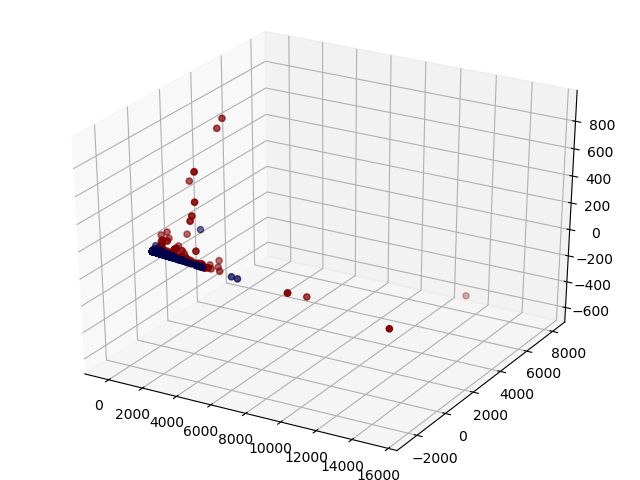

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

%matplotlib notebook

colors = ['blue','red']

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data.iloc[:,:-1])

fig = plt.figure()
ax = Axes3D(fig)

x=principalComponents[:, 0]
y=principalComponents[:, 1]
z=principalComponents[:, 2]

x1, y1 = np.meshgrid(x, y)

cset = ax.scatter(x,y,z,c=data.iloc[:,-1],cmap='seismic')
#ax.clabel(cset, fontsize=9, inline=1)
plt.show()

### lets see in 2d

<IPython.core.display.Javascript object>


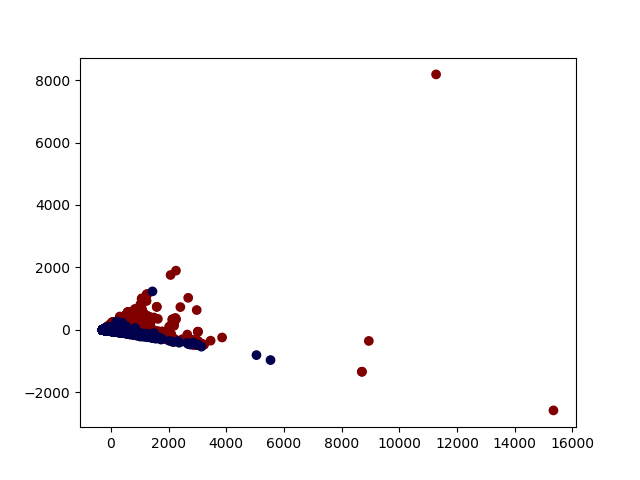

In [5]:
colors = ['blue','red']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.iloc[:,:-1])

x=principalComponents[:, 0]
y=principalComponents[:, 1]

plt.figure()
plt.scatter(x,y,c=data.iloc[:,-1],cmap='seismic')
plt.show()



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [74]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def acc(y_true, y_pred): return accuracy_score(y_true, y_pred)
def f1(y_true, y_pred): return f1_score(y_true, y_pred)

scoring = {
    'tp': make_scorer(tp), 
    'tn': make_scorer(tn),
    'fp': make_scorer(fp), 
    'fn': make_scorer(fn),
    'acc': make_scorer(acc),
    'f1': make_scorer(f1)
}



def randomSearch(m,hyperparams,n_iters=30):
    #X, Xtest, y, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.05, random_state=33) 
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
     
    s = RandomizedSearchCV(m, hyperparams,refit='acc', scoring=scoring, n_jobs=7, n_iter=n_iters)
    s.fit(X, y)
    
    results = pd.DataFrame(s.cv_results_)
    #display(results.head())
    return results

## Random Forest

In [30]:
params = {
    'n_estimators':[1000,5000,10000],
    'max_features':[0.25,0.5,1.0],
    'max_depth':[2,6,12]
}

result = randomSearch(RandomForestClassifier(),params)
display(result.columns)

C:\programs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 27 is smaller than n_iter=30. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\programs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_tp'), which wil

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_max_features', 'param_max_depth', 'params',
       'split0_test_tp', 'split1_test_tp', 'split2_test_tp', 'mean_test_tp',
       'std_test_tp', 'rank_test_tp', 'split0_train_tp', 'split1_train_tp',
       'split2_train_tp', 'mean_train_tp', 'std_train_tp', 'split0_test_tn',
       'split1_test_tn', 'split2_test_tn', 'mean_test_tn', 'std_test_tn',
       'rank_test_tn', 'split0_train_tn', 'split1_train_tn', 'split2_train_tn',
       'mean_train_tn', 'std_train_tn', 'split0_test_fp', 'split1_test_fp',
       'split2_test_fp', 'mean_test_fp', 'std_test_fp', 'rank_test_fp',
       'split0_train_fp', 'split1_train_fp', 'split2_train_fp',
       'mean_train_fp', 'std_train_fp', 'split0_test_fn', 'split1_test_fn',
       'split2_test_fn', 'mean_test_fn', 'std_test_fn', 'rank_test_fn',
       'split0_train_fn', 'split1_train_fn', 'split2_train_fn',
       'mean_train_fn', 'std_train_

'Best configuration is'

param_n_estimators param_max_features param_max_depth  mean_test_acc  \
18               1000               0.25              12       0.926103   
19               5000               0.25              12       0.925668   
20              10000               0.25              12       0.925451   
10               5000               0.25               6       0.919583   
11              10000               0.25               6       0.919583   
23              10000                0.5              12       0.919148   
9                1000               0.25               6       0.918931   
21               1000                0.5              12       0.918713   
22               5000                0.5              12       0.918496   
12               1000                0.5               6       0.914366   
13               5000                0.5               6       0.914149   
14              10000                0.5               6       0.913497   
25               5000                  1              12       0.908715   
26              10000                  1              12       0.908498   
24               1000                  1              12       0.907194   
16               5000                  1               6       0.899152   
17              10000                  1               6       0.898935   
15               1000                  1               6       0.898718   
2               10000               0.25               2       0.895240   
1                5000               0.25               2       0.894805   
0                1000               0.25               2       0.893284   
5               10000                0.5               2       0.865464   
3                1000                0.5               2       0.865464   
4                5000                0.5               2       0.864377   
8               10000                  1               2       0.842643   
7                5000                  1               2       0.842643   
6                1000                  1               2       0.842643   

    rank_test_acc  mean_test_acc  
18              1       0.926103  
19              2       0.925668  
20              3       0.925451  
10              4       0.919583  
11              4       0.919583  
23              6       0.919148  
9               7       0.918931  
21              8       0.918713  
22              9       0.918496  
12             10       0.914366  
13             11       0.914149  
14             12       0.913497  
25             13       0.908715  
26             14       0.908498  
24             15       0.907194  
16             16       0.899152  
17             17       0.898935  
15             18       0.898718  
2              19       0.895240  
1              20       0.894805  
0              21       0.893284  
5              22       0.865464  
3              22       0.865464  
4              24       0.864377  
8              25       0.842643  
7              25       0.842643  
6              25       0.842643

<IPython.core.display.Javascript object>


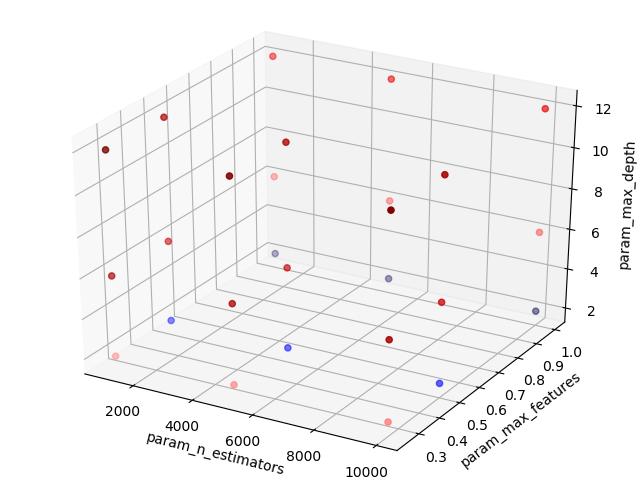

In [82]:
#stupid mapping of strings to nums
def mat_to_floats(values):
    start = 0
    s_t_f_map = {}
    ret = []
    for v in values:
        if isinstance(v, str):
            if v not in s_t_f_map:
                s_t_f_map[v]= start
                start = start + 1
            ret.append(s_t_f_map[v])
        else:
            s_t_f_map[v]= v
            ret.append(v) 
            
    return ret, {v: k for k, v in s_t_f_map.items()}
                   

def plotSearch(r, metric, x_param,y_param,z_param):

    r.sort_values(by=[metric], inplace=True,ascending=False)
    
    display("Best configuration is")
    
    #display(result.columns)

    display(r[[x_param,y_param,z_param,metric,'rank_test_acc','mean_test_acc']])

    fig = plt.figure()
    ax = Axes3D(fig)

    x, x_l =mat_to_floats(r[x_param])
    y, y_l =mat_to_floats(r[y_param])
    z, z_l =mat_to_floats(r[z_param])

    cset = ax.scatter(x,y,z,c=r[metric],cmap='seismic')
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)
    ax.set_zlabel(z_param)

    #ax.clabel(cset, fontsize=9, inline=1)
    plt.show()

    
plotSearch(result,'mean_test_acc','param_n_estimators','param_max_features','param_max_depth')

## SVC

In [75]:
from sklearn.svm import SVC

params = {
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[3,4,5,6],
    'max_iter':[1000,10000,20000,30000]
}

result2 = randomSearch(SVC(),params,n_iters=64)


C:\programs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\programs\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\programs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score

'Best configuration is'

param_kernel param_degree param_max_iter  mean_test_acc  rank_test_acc  \
2           rbf            3          20000       0.795697              1   
51          rbf            6          30000       0.795697              1   
50          rbf            6          20000       0.795697              1   
49          rbf            6          10000       0.795697              1   
33          rbf            5          10000       0.795697              1   
35          rbf            5          30000       0.795697              1   
19          rbf            4          30000       0.795697              1   
1           rbf            3          10000       0.795697              1   
18          rbf            4          20000       0.795697              1   
17          rbf            4          10000       0.795697              1   
3           rbf            3          30000       0.795697              1   
34          rbf            5          20000       0.795697              1   
48          rbf            6           1000       0.793523             13   
32          rbf            5           1000       0.793523             13   
0           rbf            3           1000       0.793523             13   
16          rbf            4           1000       0.793523             13   
15       linear            3          30000       0.730928             17   
63       linear            6          30000       0.730928             17   
47       linear            5          30000       0.730928             17   
31       linear            4          30000       0.730928             17   
29       linear            4          10000       0.713758             21   
61       linear            6          10000       0.713758             21   
45       linear            5          10000       0.713758             21   
13       linear            3          10000       0.713758             21   
62       linear            6          20000       0.643121             25   
46       linear            5          20000       0.643121             25   
30       linear            4          20000       0.643121             25   
14       linear            3          20000       0.643121             25   
23         poly            4          30000       0.639861             29   
53         poly            6          10000       0.632689             30   
..          ...          ...            ...            ...            ...   
39         poly            5          30000       0.479678             35   
21         poly            4          10000       0.474462             36   
5          poly            3          10000       0.472289             37   
7          poly            3          30000       0.466855             38   
37         poly            5          10000       0.466638             39   
54         poly            6          20000       0.463160             40   
55         poly            6          30000       0.456205             41   
20         poly            4           1000       0.392741             42   
38         poly            5          20000       0.391654             43   
6          poly            3          20000       0.376440             44   
44       linear            5           1000       0.360139             45   
12       linear            3           1000       0.360139             45   
28       linear            4           1000       0.360139             45   
60       linear            6           1000       0.360139             45   
41      sigmoid            5          10000       0.354271             49   
9       sigmoid            3          10000       0.354271             49   
25      sigmoid            4          10000       0.354271             49   
58      sigmoid            6          20000       0.354271             49   
59      sigmoid            6          30000       0.354271             49   
42      sigmoid            5          20000       0.354271             49   

<IPython.core.display.Javascript object>


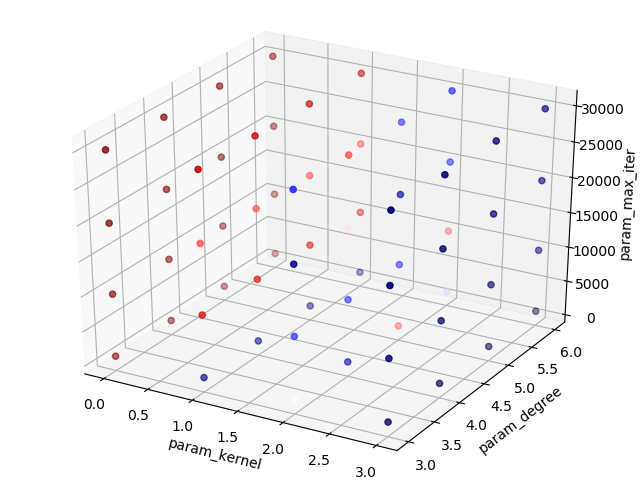

In [83]:
plotSearch(result2,'mean_test_acc','param_kernel','param_degree','param_max_iter')

'Best configuration is'

param_kernel param_degree param_max_iter  mean_test_f1  rank_test_acc  \
2           rbf            3          20000      0.749945              1   
1           rbf            3          10000      0.749945              1   
34          rbf            5          20000      0.749945              1   
3           rbf            3          30000      0.749945              1   
17          rbf            4          10000      0.749945              1   
51          rbf            6          30000      0.749945              1   
18          rbf            4          20000      0.749945              1   
19          rbf            4          30000      0.749945              1   
35          rbf            5          30000      0.749945              1   
33          rbf            5          10000      0.749945              1   
49          rbf            6          10000      0.749945              1   
50          rbf            6          20000      0.749945              1   
48          rbf            6           1000      0.747265             13   
32          rbf            5           1000      0.747265             13   
0           rbf            3           1000      0.747265             13   
16          rbf            4           1000      0.747265             13   
20         poly            4           1000      0.563567             42   
38         poly            5          20000      0.561609             43   
6          poly            3          20000      0.544728             44   
62       linear            6          20000      0.538758             25   
46       linear            5          20000      0.538758             25   
30       linear            4          20000      0.538758             25   
14       linear            3          20000      0.538758             25   
61       linear            6          10000      0.506408             21   
29       linear            4          10000      0.506408             21   
45       linear            5          10000      0.506408             21   
13       linear            3          10000      0.506408             21   
31       linear            4          30000      0.506331             17   
15       linear            3          30000      0.506331             17   
63       linear            6          30000      0.506331             17   
..          ...          ...            ...           ...            ...   
12       linear            3           1000      0.505170             45   
39         poly            5          30000      0.460405             35   
7          poly            3          30000      0.450328             38   
5          poly            3          10000      0.436525             37   
21         poly            4          10000      0.431611             36   
54         poly            6          20000      0.417092             40   
37         poly            5          10000      0.392108             39   
55         poly            6          30000      0.387646             41   
22         poly            4          20000      0.385896             32   
4          poly            3           1000      0.331434             33   
52         poly            6           1000      0.218580             34   
23         poly            4          30000      0.185378             29   
36         poly            5           1000      0.155438             31   
56      sigmoid            6           1000      0.151138             61   
8       sigmoid            3           1000      0.151138             61   
40      sigmoid            5           1000      0.151138             61   
24      sigmoid            4           1000      0.151138             61   
53         poly            6          10000      0.148736             30   
58      sigmoid            6          20000      0.110114             49   
59      sigmoid            6          30000      0.110114             49   
42      sigmoid            5          20000      0.

<IPython.core.display.Javascript object>


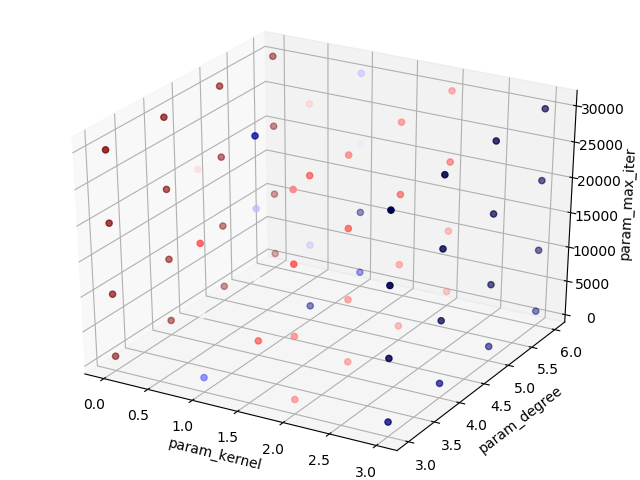

In [84]:
plotSearch(result2,'mean_test_f1','param_kernel','param_degree','param_max_iter')